# Неделя 2. Пятница

In [181]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

ss = StandardScaler()

In [62]:
train = pd.read_csv('aux/credit_train.csv')
test = pd.read_csv('aux/credit_test.csv')

y_train_column = train.columns[-1]
X_train, y_train = train.drop(y_train_column, axis=1), train[y_train_column]
X_train = ss.fit_transform(X_train)

y_test_column = test.columns[-1]
X_test, y_test = test.drop(y_test_column, axis=1), test[y_test_column]
X_test = ss.transform(X_test)

* `CCAvg` - рейтинг по кредитной карте (фича)
* `Income` - доход клиента (фича)
* `Personal.Loan` - Был ли одобрен кредит (таргет)  

Необходимо построить модель и проверить гипотезу о том, что эти два признака влияют на решение банка о выдаче/не выдаче кредита клиенту

### Логистическая регрессия

__BCELoss(_BinaryCrossEntropy_ Loss a.k.a logloss)__
  
$L = \dfrac{1}{N} \sum_{i=1}^{N}\left[y_{i_{act}} \cdot ln(y_{i_{pred}}) + (1-y_{i_{act}}) \cdot ln(1-y_{i_{pred}})\right] = $
$ = \dfrac{1}{N} \sum_{i=1}^{N}\left(y_{i_{act}} \cdot ln(\sigma(\omega_0 + x_{i1} \cdot \omega_1 + x_{i2} \cdot \omega_2 + ... + x_{in} \cdot \omega_n))) + (1-y_{i_{act}}) \cdot ln(1-(\sigma(\omega_0 + x_{i1} \cdot \omega_1 + x_{i2} \cdot \omega_2 + ... + x_{in} \cdot \omega_n))\right]$  

*  Возьмем функцию потерь на одном объекте

$L = y_{act} \cdot ln(y_{pred}) + (1-y_{act}) \cdot ln(1-y_{pred})$

$y_{act} - $ реальное значение, которое принимает наша величина

$y_{pred} - $ значение(_в виде вероятности!_), которое будет предсказывать наша модель

Наше желание, чтобы модель, давала вероятность близкую к 1 в случае, если реальное значение 1 и вероятность близкую к нулю, в случае, если реальное значение равно нулю

* Как это сделать?

мы знаем, что в случае Логистической регрессии, наше предсказание:  

$y_{pred} = \sigma(x_1 * w_1 + x_2 * w_2 + x_3 * w_3 ... + x_n * w_n + w_0)$


$w_0, w_1, w_2, ..., w_n$ - Параметры, которые мы могли бы настроить!  

А значит задача сводится к тому, чтобы минимизировать функцию $L$ правильно подобрав $w_1, w_2, ..., w_n$. Для этого нам нужен градиент!

$L(\vec{w})$ - сложная функция, которая состоит из:  
* логарифмирования
* взятия сигмоиды 
* домножения наших $\omega$ на константу - входные данные $x_1, x_2, ..., x_n$. Да да, именно они являются константами

(_Смотреть выше расписанную формулу_)

1. Посчитать для $L = y_{act} \cdot ln(y_{pred}) + (1-y_{act}) \cdot ln(1-y_{pred})$ сложную частную производную по $w_1$.

Как будет отличаться частная производная для $w_2, w_3, ..., w_n$?

2. Посчитать частную производную для $w_0$. (Свободного члена)

Математически градиент готов, останется обернуть его в алгоритм градиентного спуска и на реальных данных, где у нас ни один объект, а много сразу.
Единственной разницей того, что объектов много сразу, мы будем минимизировать функцию потерь в среднем на всех элементах.

то есть обновление происходит следующим образом:
    
$\vec{w_{new}} = \vec{w_{old}} - lr * grad L(\vec{w_{old}})$

1. Высчитывается градиент на каждом из ваших объектов(везде получаются разные $\omega_{old}$).
2. Берется средний $\vec{\omega_{old}}$ - по нему вычисляется новый $\vec{w_{new}}$

Итого:

$\vec{w_{new}} = \vec{w_{old}} - lr * mean(grad L(\vec{w_{old}}))$

3. Создать класс LogReg. При инициализации дать возможность указать learning_rate, кол-во входных фичей(n). Записать эту информацию в атрибуты класса

In [173]:
class LogReg:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X= np.array(X)
        y= np.array(y)
        n_samples = X.shape[0]
        self.coef_ = np.random.uniform(-1, 1, size=X.shape[1])
        self.intercept_ = np.random.uniform(-1, 1) 

        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            error = (y - y_pred)
            grad_w_0 = - error
            grad_w = - X * error.reshape(-1, 1)

            self.coef_ -= self.learning_rate * grad_w.mean(axis=0)
            self.intercept_ -= self.learning_rate * grad_w_0.mean()

    def sigmoid(self, z):
        return 1 / (1 + (np.exp(-z)))

    def predict(self, X):
        y_pred = self.sigmoid(X @ self.coef_ + self.intercept_)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X) >= 0.5
        return accuracy_score(y, y_pred)

7. Сравните результат с логистической регрессией в sklearn. 

In [193]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_test, y_test)
sk_coef = lr.coef_
sk_intercept = lr.intercept_
ac_score = lr.score(X_test, y_test)
print("Коэффициенты (sklearn):", *sk_coef)
print("Свободный член (sklearn):", *sk_intercept)
print(f'Accuracy score (sklearn): {ac_score}')   

Коэффициенты (sklearn): [0.51048531 2.59292837]
Свободный член (sklearn): -0.008407962995762346
Accuracy score (sklearn): 0.8697916666666666


In [196]:
my_model = LogReg(learning_rate=0.1, epochs=1000)
my_model.fit(X_test, y_test)
my_coef = my_model.coef_
my_intercept = my_model.intercept_
ac_score = my_model.score(X_test, y_test)
print("Коэффициенты (ваша модель):", my_coef)
print("Свободный член (ваша модель):", my_intercept)
print(f'Accuracy score: {ac_score}')

Коэффициенты (ваша модель): [0.53882356 2.93599896]
Свободный член (ваша модель): -0.023936195224496908
Accuracy score: 0.8697916666666666


8. Проинтерпретируйте получившиеся веса:

* Первый вес (0.53) это рейтинг по кредитной карте, значит вероятность одобрения возрастает на 0.53.
* Второй вес(2.93) это доход клиента, он гораздо силнее влияет на одобрение.
* Accuracy score - это точность предсказания.

9. Постройте 2D scatter plot, на котором отобразите:  

* по оси X - `CCAge`
* по оси Y - `Income`
* Цветом - `Personal.loan` (1 -  красным, 0 - синим)
* разделяющую прямую от логистической регрессии 

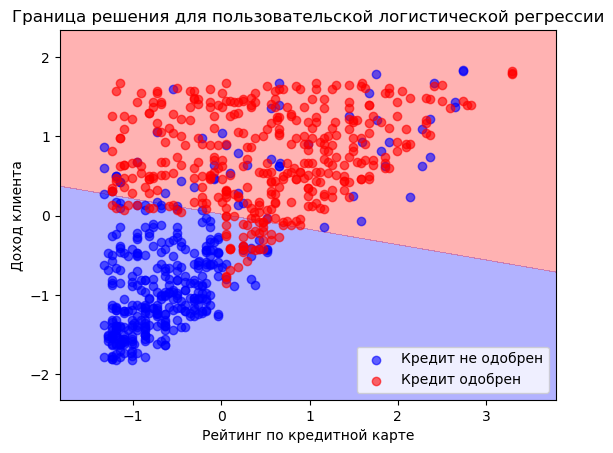

In [189]:
def plot_decision_boundary(X, y, model):
    # Делаем сетку значений для построения границы
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Прогноз вероятностей на сетке
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    # Построение разделяющей линии
    plt.contourf(xx, yy, probs, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])

    # Построение данных точек
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Кредит не одобрен', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Кредит одобрен', alpha=0.6)

    plt.xlabel('Pейтинг по кредитной карте')
    plt.ylabel('Доход клиента')
    plt.legend()
    plt.title('Граница решения для пользовательской логистической регрессии')
    plt.show()

# Данные для построения
X_train_2d = X_train[:, :2]
plot_decision_boundary(X_train_2d, y_train, my_model)

9. Напишите сервис на __streamlit__. Который даст пользователю следующий интерфейс:  

* Он может загрузить файл .csv
* После загрузки получает результат регрессии. (Словарик вида: имя столбца - вес столбца)
* А так же возможность построить scatter по любым двум фичам (цветом выделить таргет)